# THE SPARK FOUNDATION INTERNSHIP: Data Science and Business Analyst

# Task 1:Prediction Using Supervised Machine Learning 

In This Task we will perform linear regression. Here, we are going to predict the Range of Percentage based upon the number of study hours.

**Author-Ms.Shanya**

**Importing Library**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading Dataset**

In [13]:
dataset = pd.read_csv('Task-1.csv')

**Data Exploration**

In [14]:
dataset.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
dataset.shape

(25, 2)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
#checking null values
dataset.isnull().any()

Hours     False
Scores    False
dtype: bool

In [18]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting data**

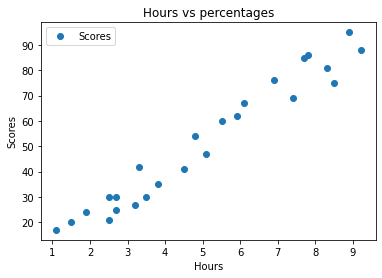

In [19]:
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs percentages')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Data Preprocessing**

In [20]:
x = dataset.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y = dataset.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Model Training**

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression  
rs = LinearRegression()  
rs.fit(x_train, y_train) 

print("Training completed!")

Training completed!


In [24]:
print('intercept:',rs.intercept_)

intercept: 2.018160041434662


In [25]:
print('coefficient:',rs.coef_)

coefficient: [9.91065648]


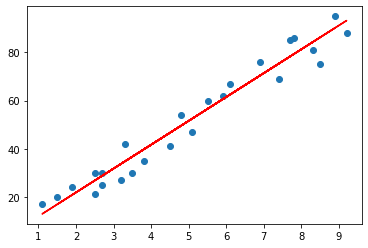

In [26]:
# plotting the regression line
line = rs.coef_*x+rs.intercept_

# plotting test data
plt.scatter(x,y)
plt.plot(x,line, color='red')
plt.show()

In [27]:
rs.predict([[5]])[0].round(2)

51.57

In [28]:
# testing data
print(x_test)

# model prediction
y_pred = rs.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Model Prediction**

In [30]:
#Actual value vs Predicted value
df = pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
df

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Testing the model with our own data**

In [31]:
hours = 7.4
h = np.array([hours])
h = h.reshape(-1,1)
pred = rs.predict(h)
print(' Predicted score when a student will study for  8.2 hrs/day={}'.format(pred[0]))

 Predicted score when a student will study for  8.2 hrs/day=75.35701799818725
